In [48]:
# import libraries.
import requests
import json
import os
import datetime


In [49]:


def get_data(restpath, filename):
    BASE_URL = "http://127.0.0.1:9090"
    URL = f"{BASE_URL}/{restpath}"
    print(URL)
    try:
        with requests.get(URL, stream=True) as response:
            if response.status_code == 200:
                print(f"Retrieving data from {URL}...")
                data_list = []
                for line in response.iter_lines():
                    if line:
                        data = json.loads(line.decode('utf-8'))
                        # Expecting data to be a list of hits
                        data_list.extend(data)  # extend instead of append

                # 异步保存数据到文件
                save_data_to_file(data_list, filename)
    except requests.exceptions.RequestException as e:
        print(f"Error: An exception occurred while requesting data from {URL}. Exception: {e}")
        return None

def save_data_to_file(data, filename):
    with open(filename, 'w') as f:
        json.dump(data, f, indent=4)
    print(f"Data saved to {filename}")

# Example call to get_data
# get_data('your_rest_path', 'output.json')


In [50]:
# Obtain data from the backend server
ROUTE_LIST = ["aircondition","weathercondition","mastodon-aus-social","child-air-quality"]
# You can change the time limit by change the days here in datetime.timedelta(days=3)
mastondayLimit = datetime.datetime.now() - datetime.timedelta(days=3)
current_time = datetime.datetime.now().replace(hour=0, minute=0, second=0, microsecond=0).strftime('%Y-%m-%d-%H')
begin_time = mastondayLimit.replace(hour=0, minute=0, second=0, microsecond=0).strftime('%Y-%m-%d-%H')
print(current_time)
print(begin_time)
data_folder = '../data/realtimeData'
for route in ROUTE_LIST:
        restpath = "database/" + route
        if route == 'mastodon-aus-social':
                # only get mastodon data in 5 days, or it will may take too much time to process
                restpath = f"database/{route}/{begin_time}/{current_time}"
        filename = os.path.join(data_folder, f"{route}.json")
        data = get_data(restpath,filename)


2024-05-22-00
2024-05-19-00
http://127.0.0.1:9090/database/aircondition
Retrieving data from http://127.0.0.1:9090/database/aircondition...
Data saved to ../data/realtimeData/aircondition.json
http://127.0.0.1:9090/database/weathercondition
Retrieving data from http://127.0.0.1:9090/database/weathercondition...
Data saved to ../data/realtimeData/weathercondition.json
http://127.0.0.1:9090/database/mastodon-aus-social/2024-05-19-00/2024-05-22-00
Retrieving data from http://127.0.0.1:9090/database/mastodon-aus-social/2024-05-19-00/2024-05-22-00...
Data saved to ../data/realtimeData/mastodon-aus-social.json
http://127.0.0.1:9090/database/child-air-quality
Retrieving data from http://127.0.0.1:9090/database/child-air-quality...
Data saved to ../data/realtimeData/child-air-quality.json


In [51]:

ROUTE_LIST = ["aircondition", "weathercondition"]
data_folder = '../data/dataInOneDay'

yesterday = datetime.datetime.now() - datetime.timedelta(days=1)

currentTime = yesterday.replace(hour=23, minute=0, second=0, microsecond=0).strftime('%Y-%m-%d-%H')
print(currentTime)

# 获取昨天的00:00时间
beginTime = yesterday.replace(hour=0, minute=0, second=0, microsecond=0).strftime('%Y-%m-%d-%H')
print(beginTime)

for route in ROUTE_LIST:
    restpath = f"database/{route}/{beginTime}/{currentTime}"
    filename = os.path.join(data_folder, f"{route}_yesterday.json")
    print(f"Processing {restpath} from {beginTime} to {currentTime}")
    # 调用get_data函数
    get_data(restpath, filename)


2024-05-21-23
2024-05-21-00
Processing database/aircondition/2024-05-21-00/2024-05-21-23 from 2024-05-21-00 to 2024-05-21-23
http://127.0.0.1:9090/database/aircondition/2024-05-21-00/2024-05-21-23


Retrieving data from http://127.0.0.1:9090/database/aircondition/2024-05-21-00/2024-05-21-23...
Data saved to ../data/dataInOneDay/aircondition_yesterday.json
Processing database/weathercondition/2024-05-21-00/2024-05-21-23 from 2024-05-21-00 to 2024-05-21-23
http://127.0.0.1:9090/database/weathercondition/2024-05-21-00/2024-05-21-23
Retrieving data from http://127.0.0.1:9090/database/weathercondition/2024-05-21-00/2024-05-21-23...
Data saved to ../data/dataInOneDay/weathercondition_yesterday.json


In [52]:
# Obtain data from different time period
route_name = "database/aircondition/2024-05-21-00/2024-05-22-02"
data = get_data(route_name, "timeperiod.json")
print(data)

http://127.0.0.1:9090/database/aircondition/2024-05-21-00/2024-05-22-02
Retrieving data from http://127.0.0.1:9090/database/aircondition/2024-05-21-00/2024-05-22-02...
Data saved to timeperiod.json
None


### All the file path

In [53]:
mastodon_file_path = '../data/realtimeData/mastodon-aus-social.json'
air_quality_file_path = '../data/realtimeData/aircondition.json'
weather_file_path = '../data/realtimeData/weathercondition.json'
today_air_quality_file_path = '../data/dataInOneDay/aircondition_yesterday.json'
today_weather_file_path = '../data/dataInOneDay/weathercondition_yesterday.json'
child_air_quality = '../data/realtimeData/child-air-quality.json'

### Yesterday's Data

/Users/autumn/Learning/CCC/ass2/CloudComputing_HumanDensityVSweather/frontend/oneDayAnalysis/air_quality_one_day.py:30: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.figure(figsize=(14, 7))


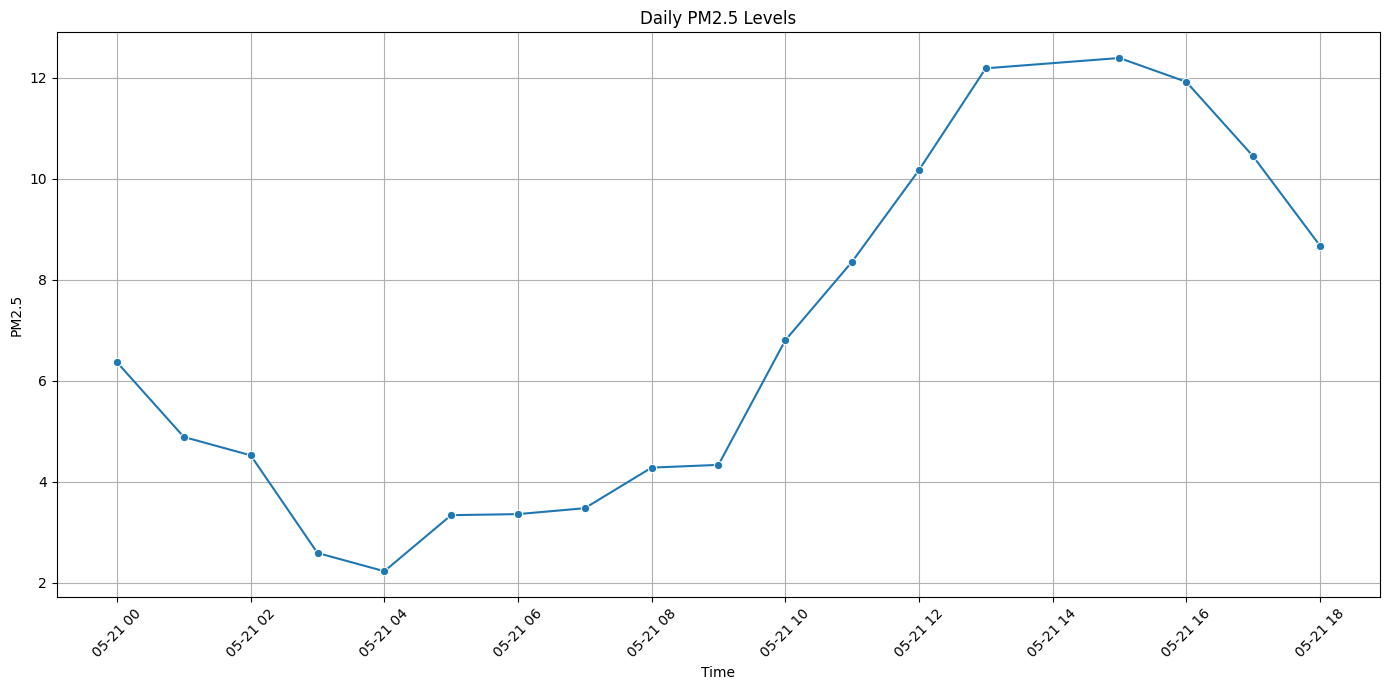

In [54]:
# Today's air quality

import oneDayAnalysis.air_quality_one_day as aqa
today_air_quality = aqa.load_pm25_data(today_air_quality_file_path)

aqa.visualize_pm25(today_air_quality)

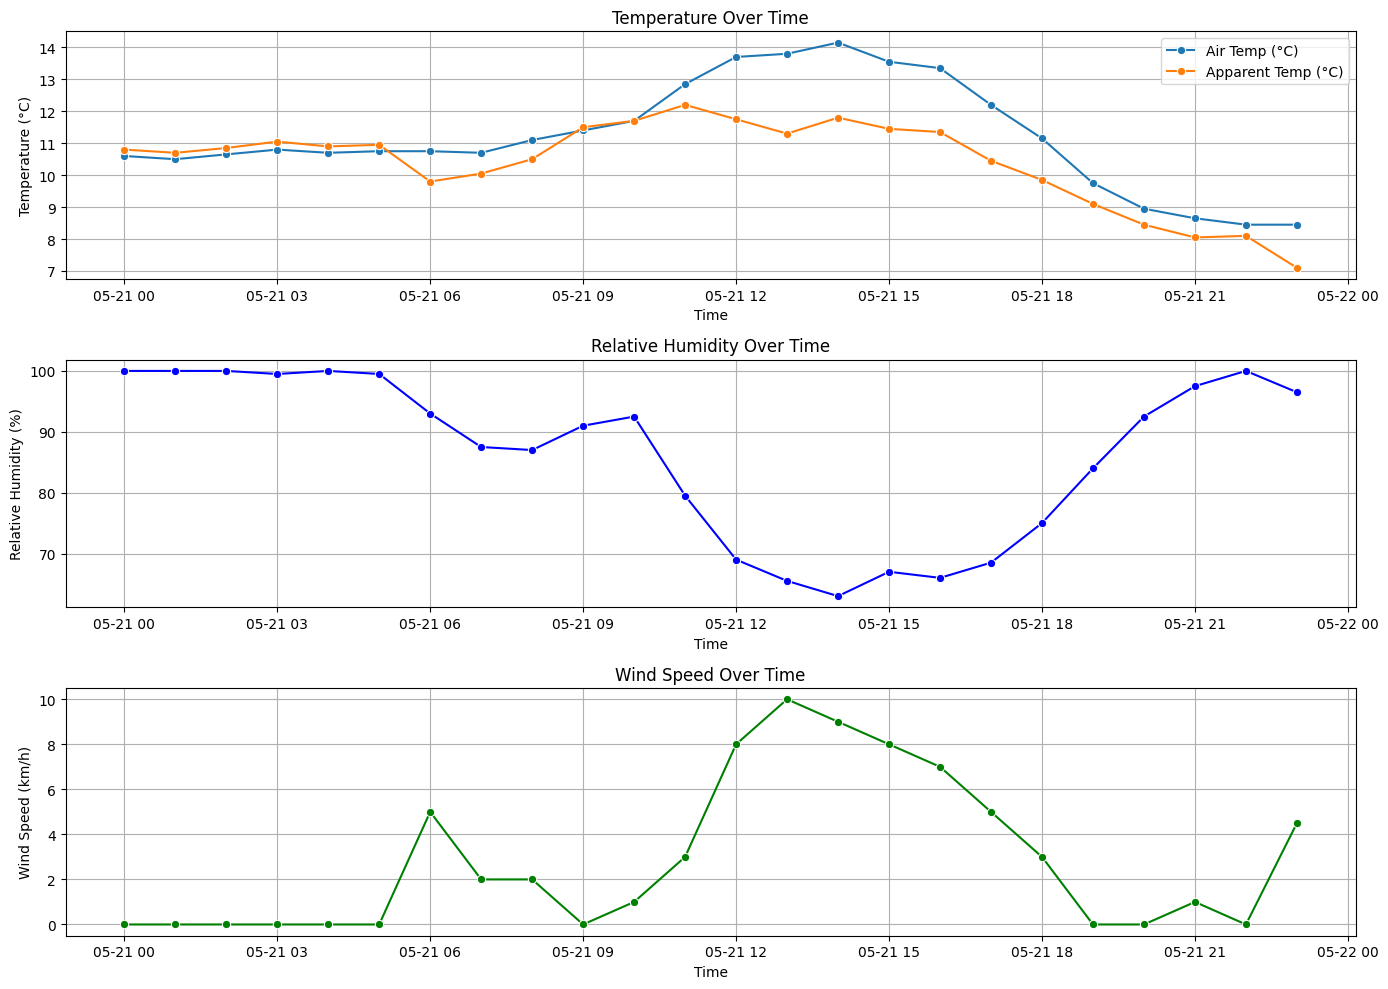

In [55]:
# today's weather
import oneDayAnalysis.weather_one_day as woa

today_weather = woa.load_weather_data(today_weather_file_path)
woa.visualize_weather_data(today_weather)

### Air Quality vs Sentiment

In [56]:
import aircondition_vs_sentiment.format_alignment as sfa
import aircondition_vs_sentiment.sentiment_analysis as fa
import aircondition_vs_sentiment.air_quality_analysis as aqa

# read data from file, using these path file
mastodon_df = sfa.load_mastodon_data(mastodon_file_path)
air_quality_data = sfa.load_air_quality_data(air_quality_file_path)

# 合并数据
merged_df = sfa.merge_data(mastodon_df, air_quality_data)

# 添加情绪分析列
merged_df = fa.add_sentiment_column(merged_df)

# 分析空气质量对情绪的影响
grouped = aqa.analyze_air_quality_impact(merged_df)


KeyboardInterrupt: 

/Users/autumn/Learning/CCC/ass2/CloudComputing_HumanDensityVSweather/frontend/aircondition_vs_sentiment/air_quality_analysis.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Air Quality Category', y='Average Sentiment', data=grouped, palette="coolwarm")


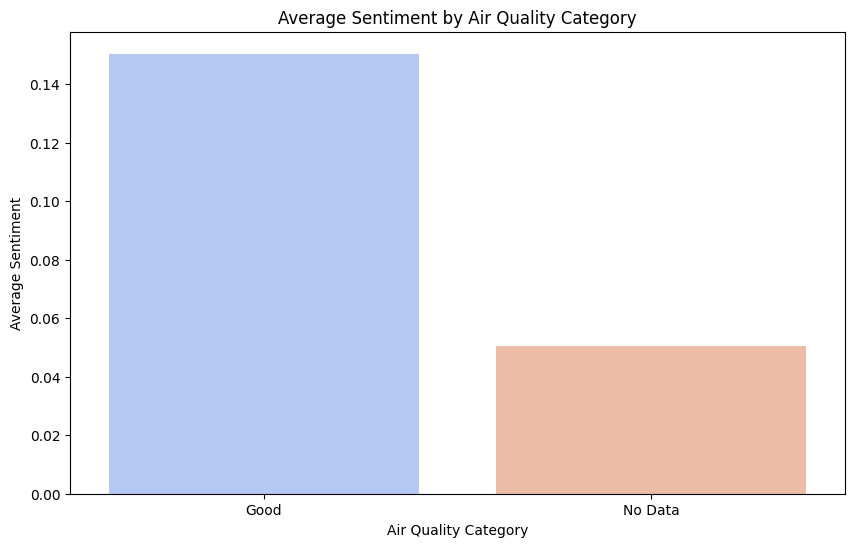

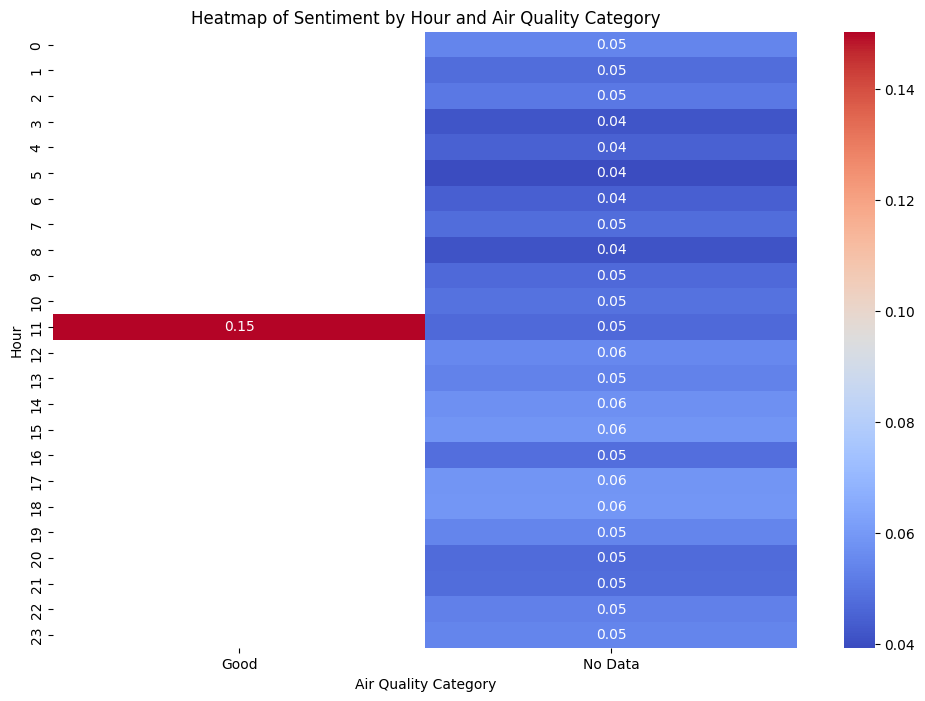

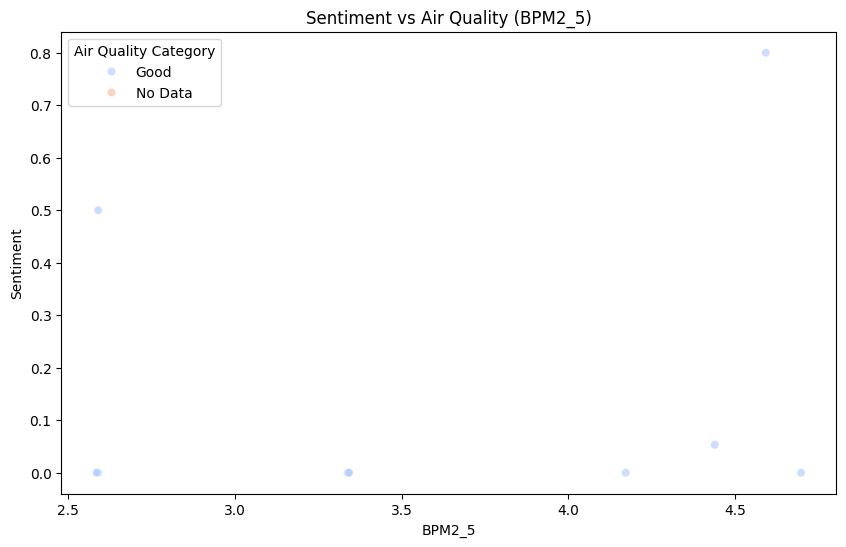

In [ ]:
 # 可视化结果
aqa.visualize_air_quality_impact(grouped)
aqa.plot_heatmap(merged_df)
aqa.plot_scatter(merged_df)

### Weather vs Sentiment

In [ ]:
import weather_vs_sentiment.weather_analysis as wa


# read data from file, using these path file
mastodon_df = wa.load_mastodon_data(mastodon_file_path)
weather_data = wa.load_weather_data(weather_file_path)

# 合并数据
merged_df = wa.merge_weather_data(mastodon_df, weather_data)
corr_matrix = wa.analyze_weather_impact(merged_df)


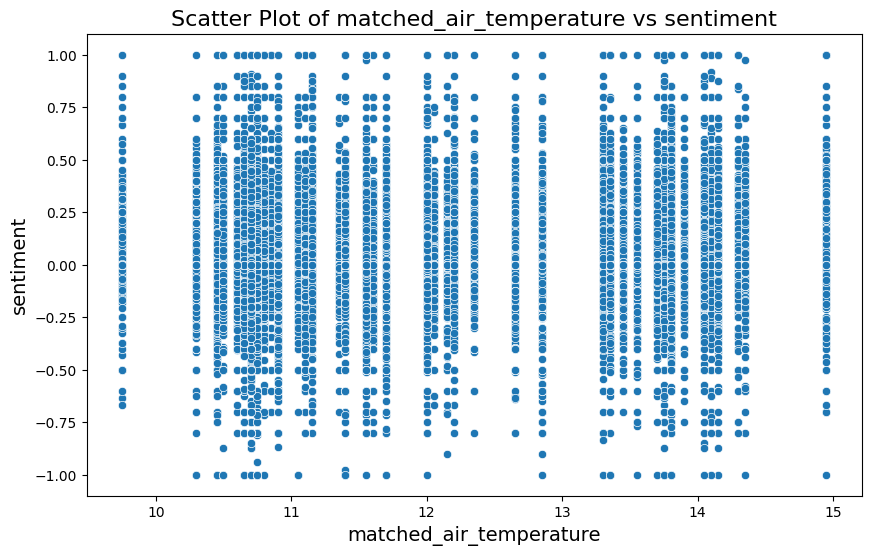

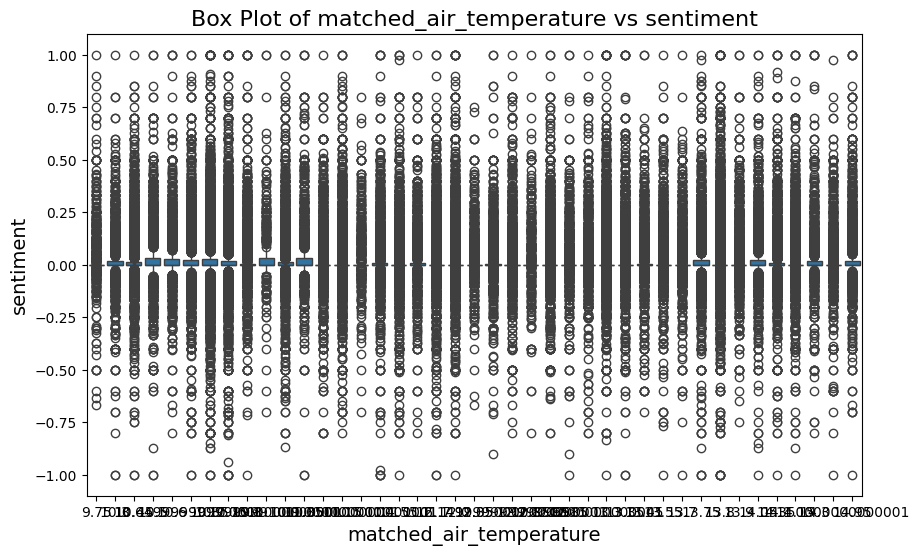

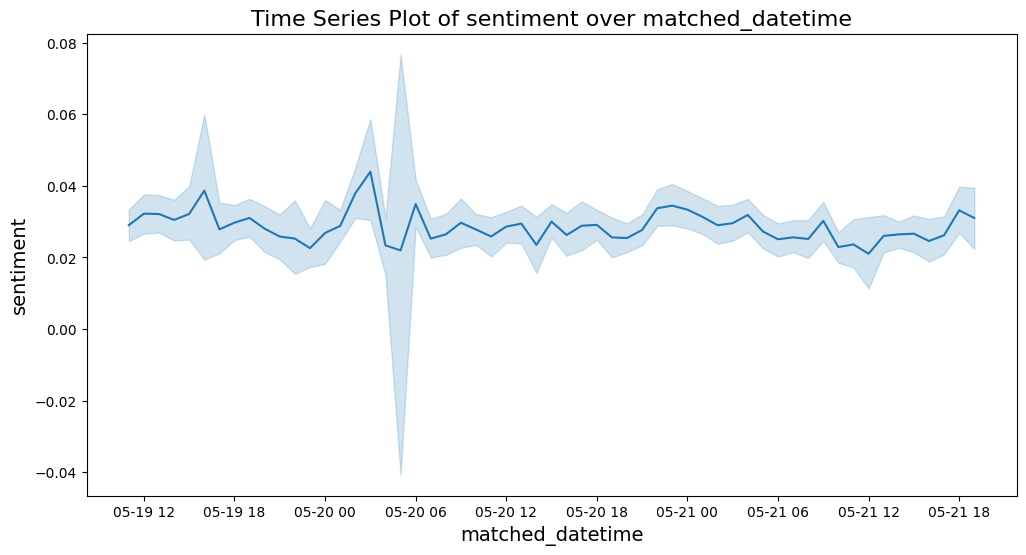

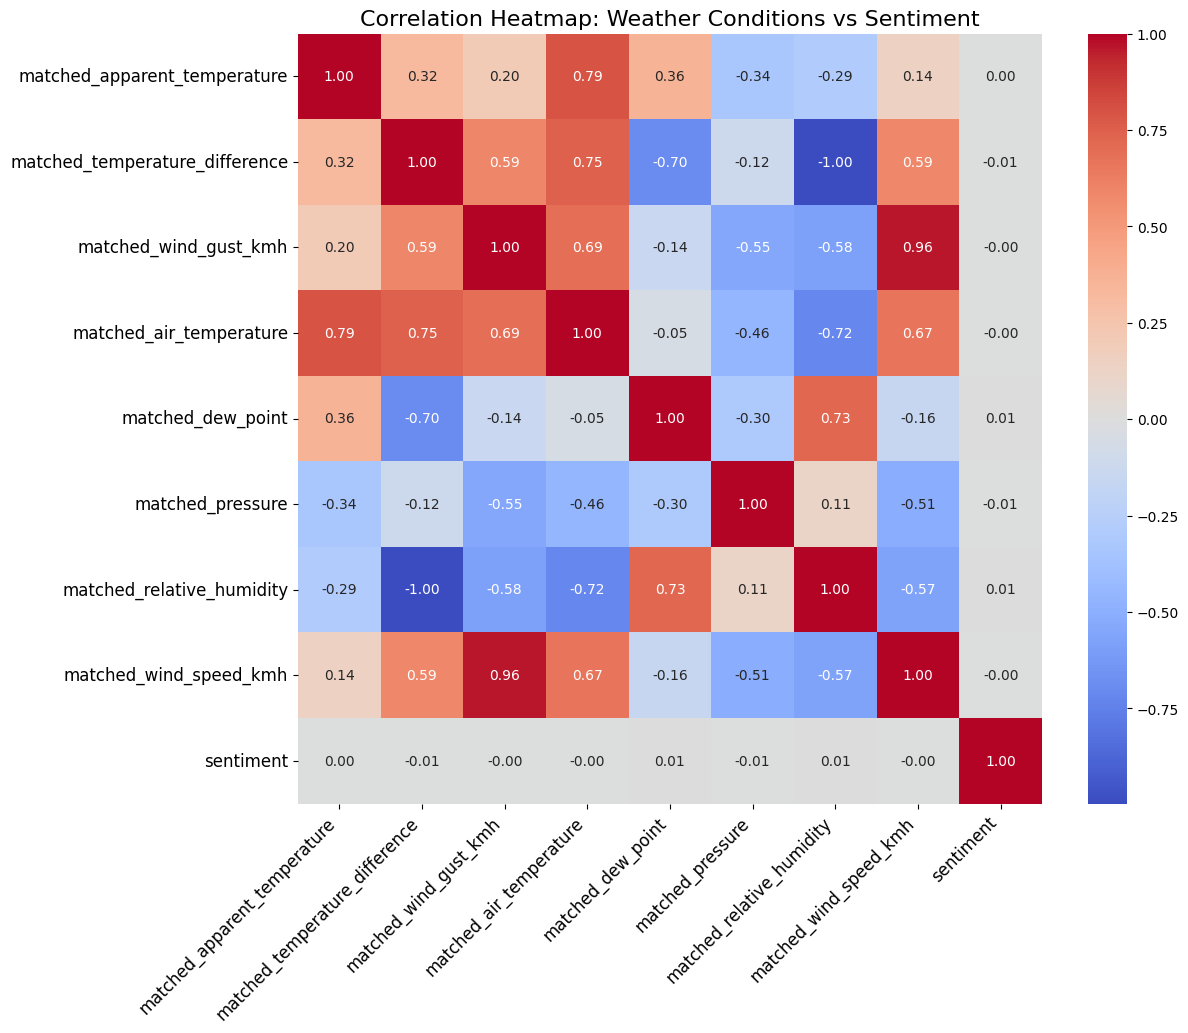

In [ ]:
# 散点图示例
wa.plot_scatter(merged_df, x_col='matched_air_temperature')

# 箱线图示例
wa.plot_box(merged_df, x_col='matched_air_temperature')

# 时间序列图示例
wa.plot_time_series(merged_df, time_col='matched_datetime', y_col='sentiment')

wa.visualize_weather_impact(corr_matrix)

### Aircondition vs Weather

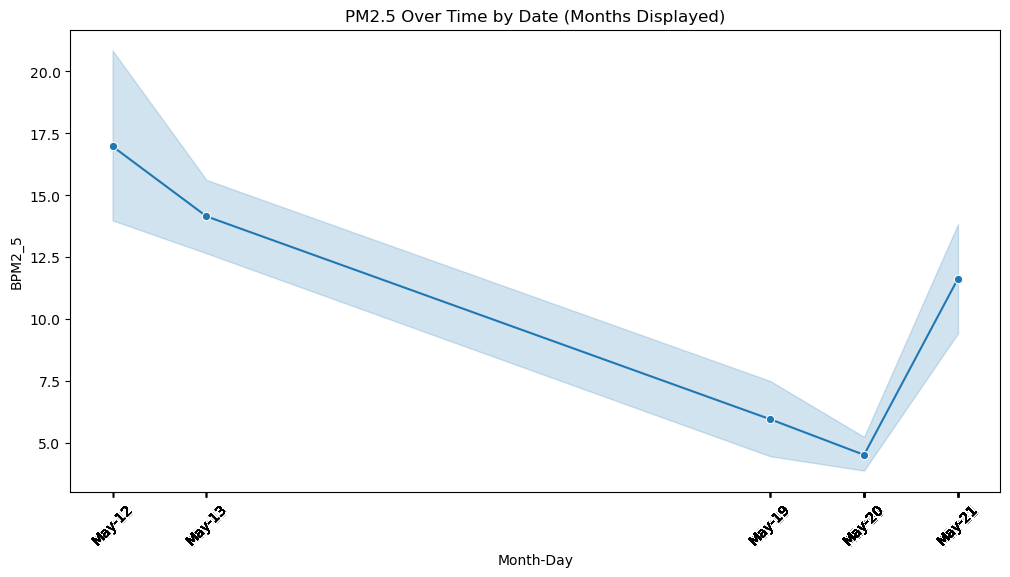

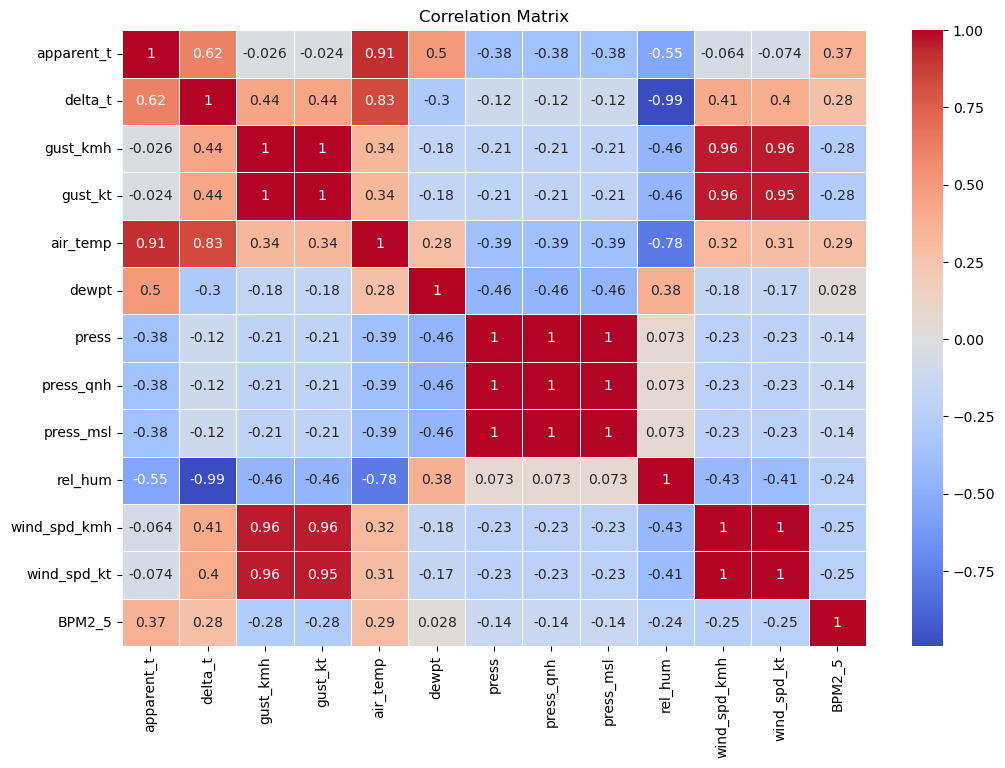

Mean Squared Error: 31.66474489783227
R^2 Score: -0.1629487990988867


In [ ]:
import aircondition_vs_weather.Air_weather_analysis as awa

awa.main(weather_file_path, air_quality_file_path)

### Language Distribution around Australia

In [ ]:
import language_distribution.language_analysis as ld

mastodon_df = ld.load_mastodon_data(mastodon_file_path)
location_language_distribution = ld.analyze_language_distribution_by_location(mastodon_df)

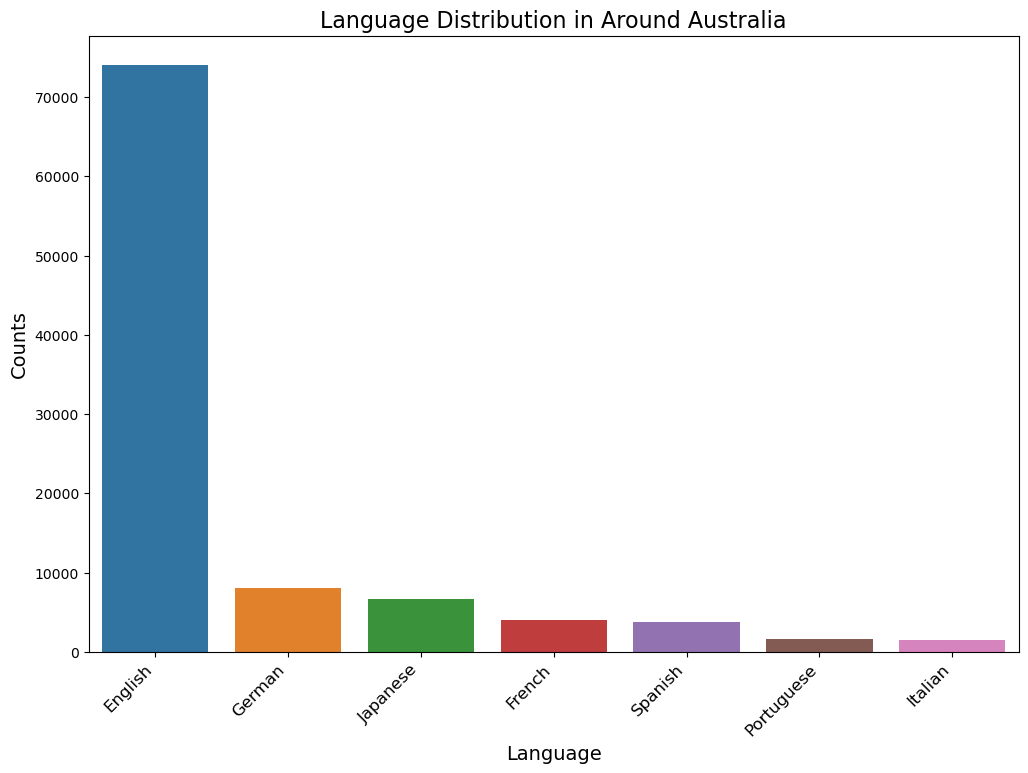

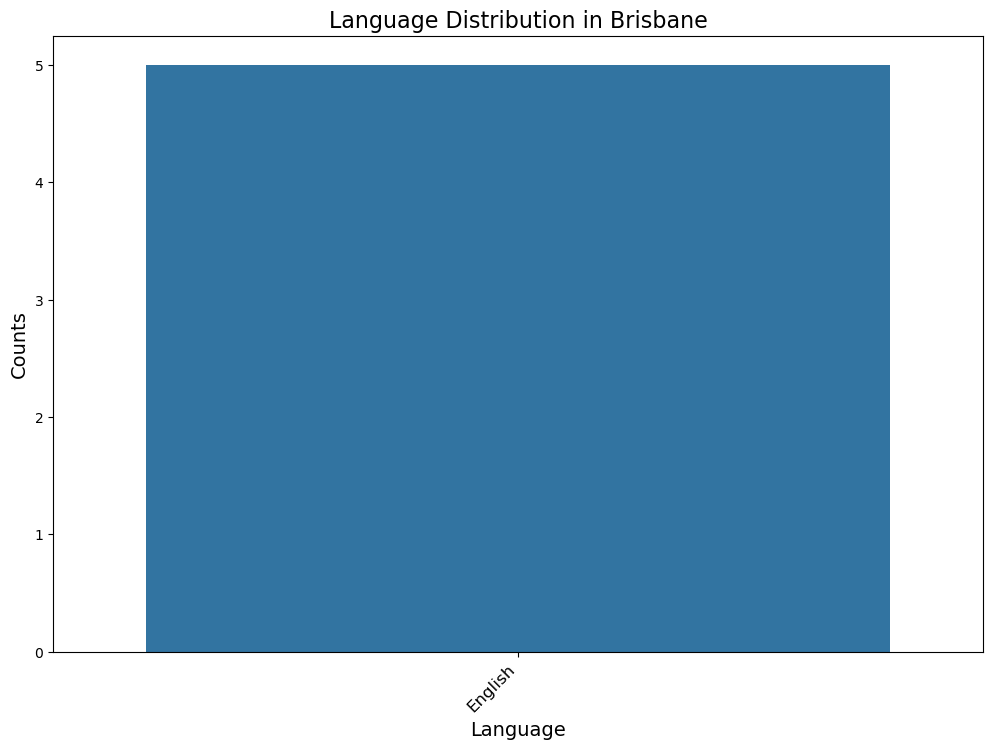

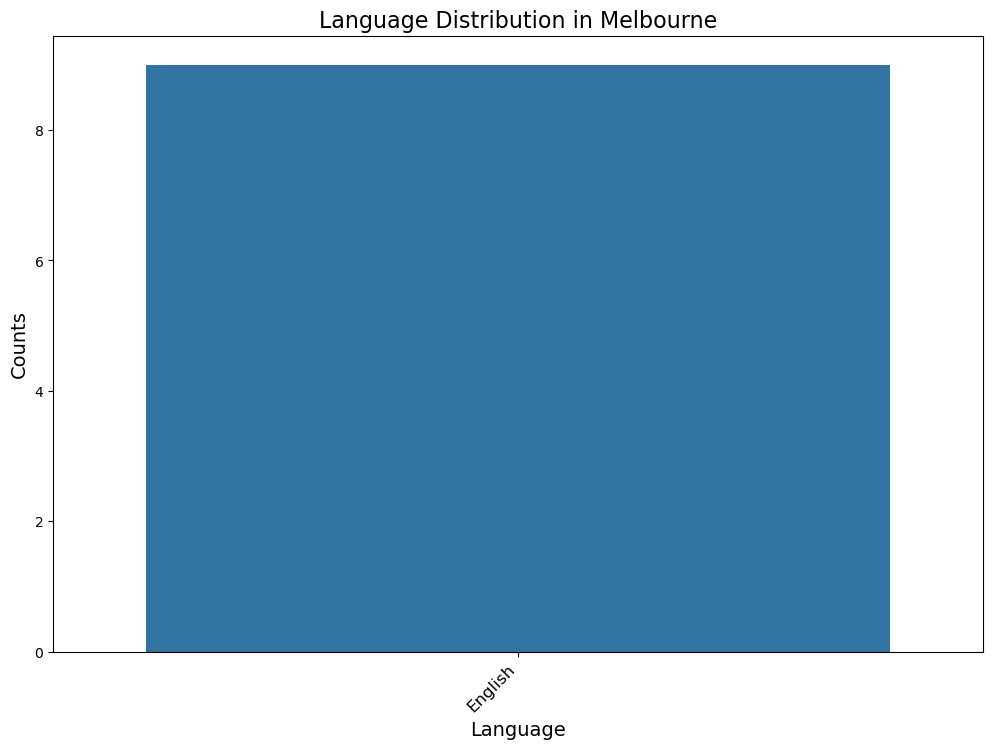

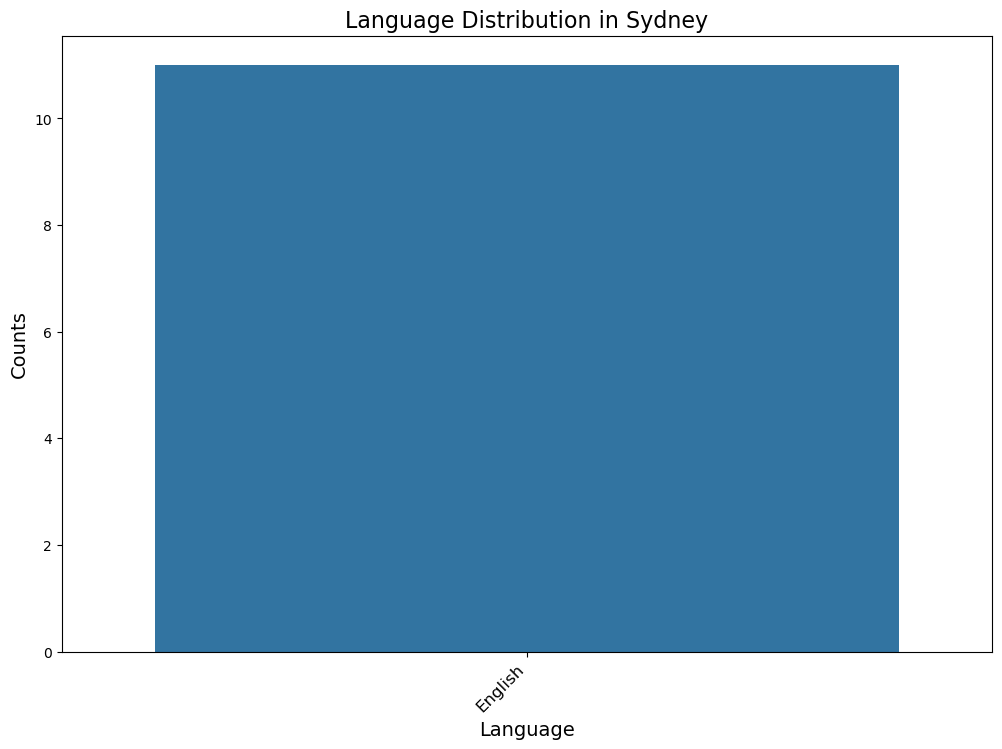

In [ ]:
ld.visualize_language_distribution_by_location(location_language_distribution)

### Method of Travel

In [ ]:
import methods_of_residents.travel_analysis as ta

mastodon_df = ta.load_mastodon_data(mastodon_file_path)
travel_stats, most_popular_travel_modes = ta.analyze_travel_modes(mastodon_df)

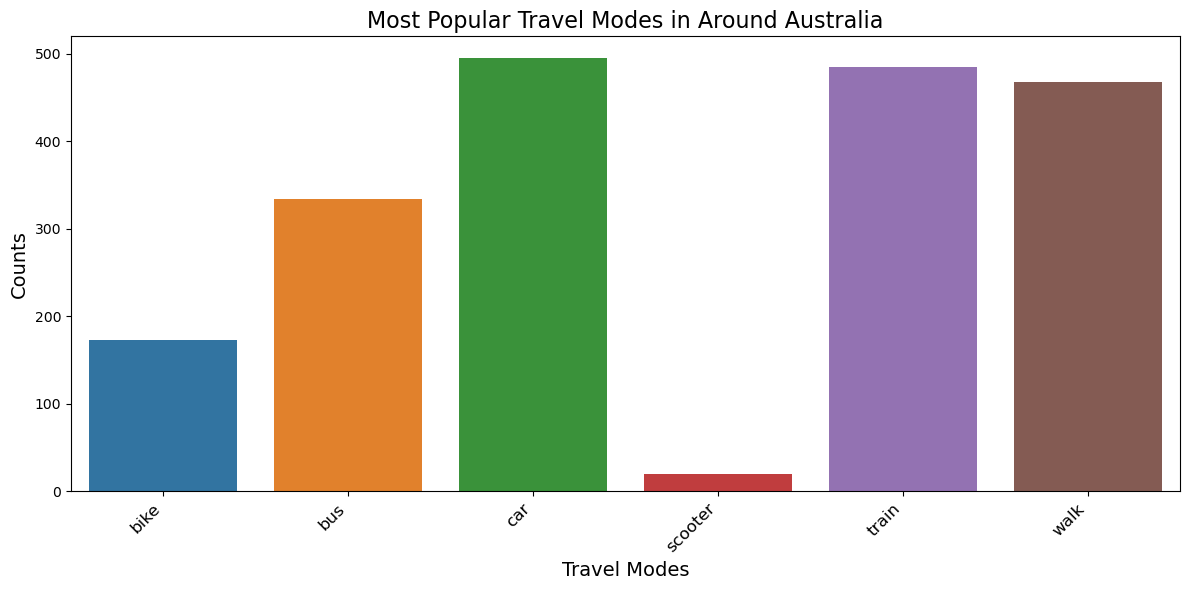

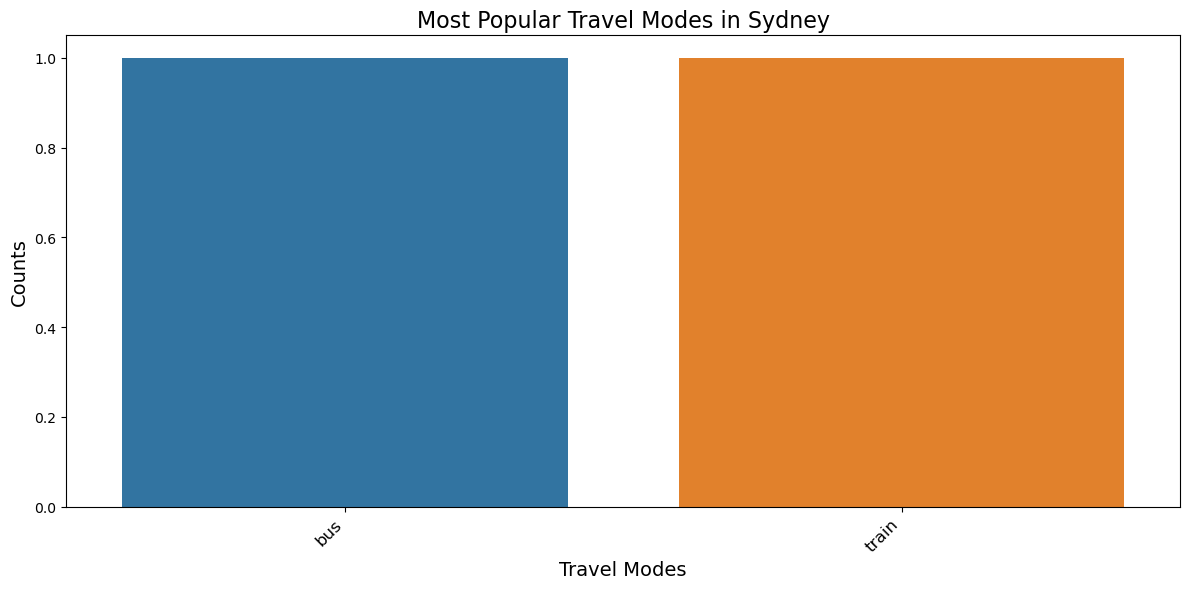

In [ ]:
ta.visualize_travel_modes_by_city(travel_stats)